## Exploratory Data Analysis of Stroke Data
By Mahfuz Miah, September 5, 2019

## 1. Synopsis
For this project, I performed some exploratory analysis on stroke data. This dataset was found on Kaggle, uploaded by user SaumyaAgarwal and can be retrieved at this link: [Stroke Data](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data). The dataset we have executed our code on was downloaded on Sept 5th, 2019.

The goal of our project was to investigate the relationship between incidence of stroke and other categorical knowledge about a patient. In this dataset, we have data about gender, age, hypertension, heart disease, marriage status, work type, residence type, glucose level BMI, smoking status and incidence of stroke. We are curious to see how these different measures relate to stroke incidence.

## 2. Background
Here are the definitions of the columns of the data:

- id-Patient ID
- gender-Gender of Patient
- age-Age of Patient
- hypertension-0 - no hypertension, 1 - suffering from hypertension
- heart_disease-0 - no heart disease, 1 - suffering from heart disease
- ever_married-Yes/No
- work_type-Type of occupation
- Residence_type-Area type of residence (Urban/ Rural)
- avg_glucose_level-Average Glucose level (measured after meal)
- bmi-Body mass index
- smoking_status-patient’s smoking status
- stroke-0 - no stroke, 1 - suffered stroke

## 3. Understanding and Preparing the Data Set

In [2]:
# import all necessary libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import statistics
import seaborn as sns


In [3]:
# Set up the data

filename = 'train_2v.csv'
def setdata(filename):
    df = pd.read_csv(filename)
    # Strip and make column names lowercase so that they are easy to manage. 
    df.columns = df.columns.str.strip().str.lower()

    # Replace characters or remove spaces and make all words lowercase.
    df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')

    return df

df = setdata(filename)

In [4]:
# What's inside the file? Let's take a preview.
def whats_inside(df):
    print("Column values in dataframe: ", list(df.columns.values)) 
    print(df.describe())
    
whats_inside(df)

Column values in dataframe:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
                 id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.13310

In [5]:
#List of unique values in the df['name'] column
def uniqueval(df):
    column_names = list(df.columns.values)
    for column_name in column_names:
        print("There are " + str(df[column_name].nunique()) + " unique values in column \'" + column_name + "\'.")
uniqueval(df)

There are 43400 unique values in column 'id'.
There are 3 unique values in column 'gender'.
There are 104 unique values in column 'age'.
There are 2 unique values in column 'hypertension'.
There are 2 unique values in column 'heart_disease'.
There are 2 unique values in column 'ever_married'.
There are 5 unique values in column 'work_type'.
There are 2 unique values in column 'residence_type'.
There are 12543 unique values in column 'avg_glucose_level'.
There are 555 unique values in column 'bmi'.
There are 3 unique values in column 'smoking_status'.
There are 2 unique values in column 'stroke'.


Our dataframe has 43400 entries and many of the categorical columns have binary information (Yes/No responses in the form of 1 and 0, respectively).

# 4. Feature Engineering

In [79]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [15]:
# Some data cleaning
df1 = df.dropna(subset=['gender','stroke']).copy()

# make a function check changes in dfs
def checkshape (df,df1):
    print("First df shape was:", df.shape[0])
    print("Second df shape was:", df1.shape[0])
    print("We have removed", df.shape[0] - df1.shape[0], "entries")
checkshape(df,df1)

First df shape was: 43400
Second df shape was: 43400
We have removed 0 entries


In [74]:
# Remove entries without Male/Female gender ascription
df2 = df1[df1.gender.apply(lambda x: x in ['Male','Female'])]
checkshape(df,df2)

First df shape was: 43400
Second df shape was: 43389
We have removed 11 entries


In [75]:
df3 = df2.groupby('stroke').mean()
df3

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36317.861522,41.743329,0.090621,0.044243,104.025555,28.585487
1,36788.836526,68.143448,0.255428,0.226054,129.582669,29.868118


In [86]:
#print("Orginal rows:")
#print(df2)
#print("\nReplace the ‘hypertension' column that contains the values '1' and '0'  with True and False:")
df4 = df2.copy()
df4['hypertension'] = df4['hypertension'].map({1: True, 0: False}).copy()
df4['heart_disease'] = df4['heart_disease'].map({1: True, 0: False}).copy()
df4['stroke'] = df4['stroke'].map({1: True, 0: False}).copy()
df4.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,False,False,No,children,Rural,95.12,18.0,NaN,False
1,30468,Male,58.0,True,False,Yes,Private,Urban,87.96,39.2,never smoked,False
2,16523,Female,8.0,False,False,No,Private,Urban,110.89,17.6,NaN,False
3,56543,Female,70.0,False,False,Yes,Private,Rural,69.04,35.9,formerly smoked,False
4,46136,Male,14.0,False,False,No,Never_worked,Rural,161.28,19.1,NaN,False


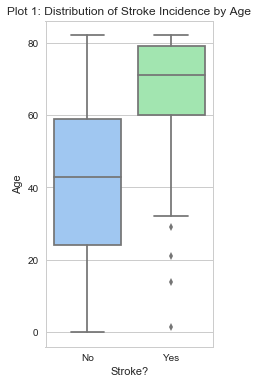

In [100]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")
plt.figure(figsize=(3,6))

ax = sns.boxplot(x='stroke',y='age',data=df4,palette='pastel')  
plt.title('Plot 1: Distribution of Stroke Incidence by Age')
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions,labels,rotation=0)
#sns.despine(offset=10, trim=True)
ax.set(xlabel='Stroke?', ylabel='Age')
# Put a legend to the right side
#ax.legend(loc='best', bbox_to_anchor=(1.15, .5), ncol=1)
plt.show()

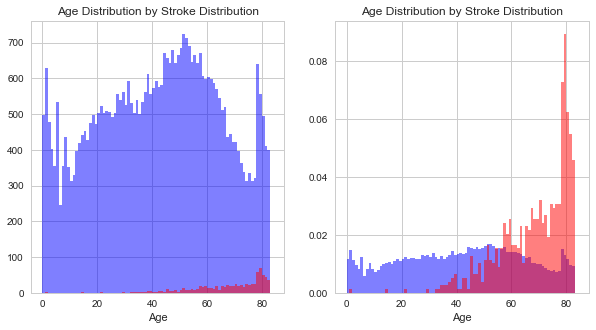

In [109]:
plt.figure(figsize=(10, 5))
x = df4['age'][df4.stroke == False]
y = df4['age'][df4.stroke == True]

plt.subplot(1, 2, 1)
plt.hist(x, density=False, color='blue', bins=np.arange(0, 85), alpha=.5) 
plt.hist(y, density=False, color='red', bins=np.arange(0, 85), alpha=.5)
plt.title('Age Distribution by Stroke Distribution')
plt.xlabel('Age')

# Same data, this time normed, using density.
plt.subplot(1, 2, 2)
plt.hist(x, density=True, color='blue', bins=np.arange(0, 85), alpha=.5) 
plt.hist(y, density=True, color='red', bins=np.arange(0, 85), alpha=.5)
plt.title('Age Distribution by Stroke Distribution')
plt.xlabel('Age')

plt.show()

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:936: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x12a040da0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


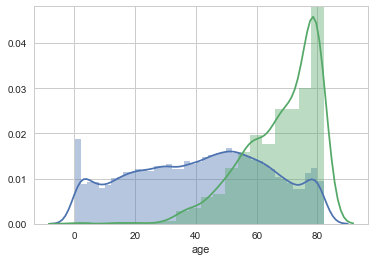

In [122]:
# Same as above, distribution of age by stroke incidence
plot1 = sns.distplot(x);
plot2 = sns.distplot(y);
#ax.set_title('Age Distribution by Stroke Distribution')
#plt.legend([plot1,plot2],["plot 1", "plot 2"])
# HOW DO WE ADD A TITLE AND LEGEND TO THIS?

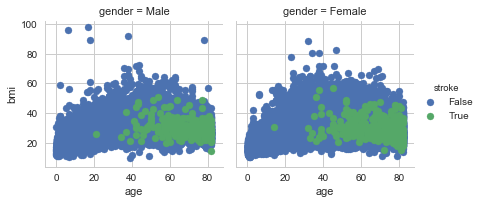

In [125]:
g = sns.FacetGrid(df4, hue="stroke", col="gender")
g.map(plt.scatter, "age", "bmi")
#g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

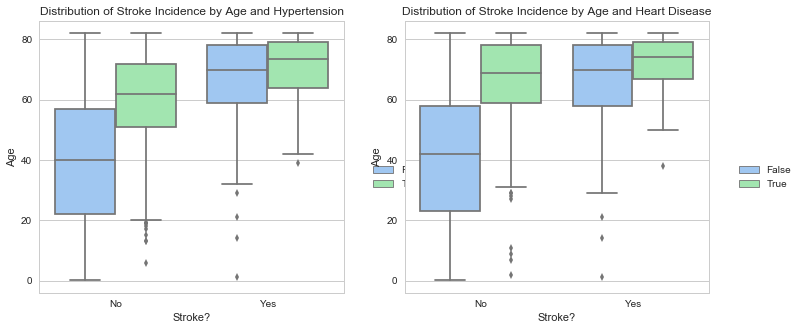

In [131]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
ax = sns.boxplot(x='stroke',y='age',hue = 'hypertension', data=df4,palette='pastel')  
plt.title('Distribution of Stroke Incidence by Age and Hypertension')
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions,labels,rotation=0)
#sns.despine(offset=10, trim=True)
ax.set(xlabel='Stroke?', ylabel='Age')
ax.set(xlabel='Stroke?', ylabel='Age')
# Put a legend to the right side
ax.legend(loc='best', bbox_to_anchor=(1.3, .5), ncol=1)

plt.subplot(1, 2, 2)
# Setting the overall aesthetic.
sns.set(style="whitegrid")

ax = sns.boxplot(x='stroke',y='age',hue = 'heart_disease', data=df4,palette='pastel')  
plt.title('Distribution of Stroke Incidence by Age and Heart Disease')
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions,labels,rotation=0)
#sns.despine(offset=10, trim=True)
ax.set(xlabel='Stroke?', ylabel='Age')
ax.set(xlabel='Stroke?', ylabel='Age')
# Put a legend to the right side
ax.legend(loc='best', bbox_to_anchor=(1.3, .5), ncol=1)

# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.95)

plt.show()

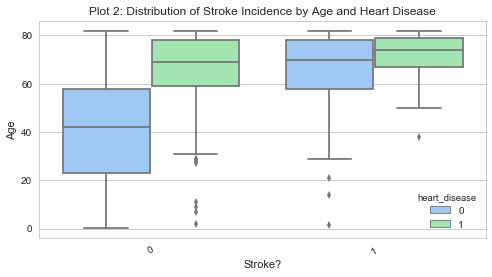

In [34]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.boxplot(x='stroke',y='age',hue = 'heart_disease', data=df2,palette='pastel')  
plt.title('Plot 2: Distribution of Stroke Incidence by Age and Heart Disease')
plt.xticks(rotation=30)
#sns.despine(offset=10, trim=True)
ax.set(xlabel='Stroke?', ylabel='Age')
ax.set(xlabel='Stroke?', ylabel='Age')
# Put a legend to the right side
#ax.legend(loc='best', bbox_to_anchor=(1.15, .5), ncol=1)
plt.show()

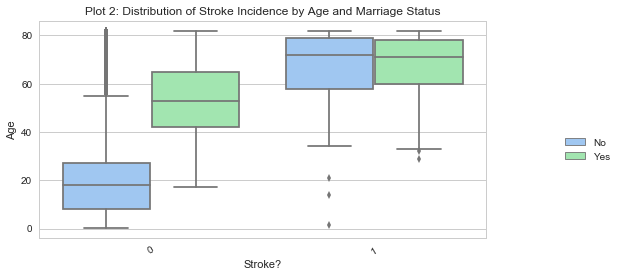

In [40]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.boxplot(x='stroke',y='age',hue = 'ever_married', data=df2,palette='pastel')  
plt.title('Plot 2: Distribution of Stroke Incidence by Age and Marriage Status')
plt.xticks(rotation=30)
#sns.despine(offset=10, trim=True)
ax.set(xlabel='Stroke?', ylabel='Age')
ax.set(xlabel='Stroke?', ylabel='Age')
# Put a legend to the right side
ax.legend(loc='best', bbox_to_anchor=(1.3, .5), ncol=1)
plt.show()

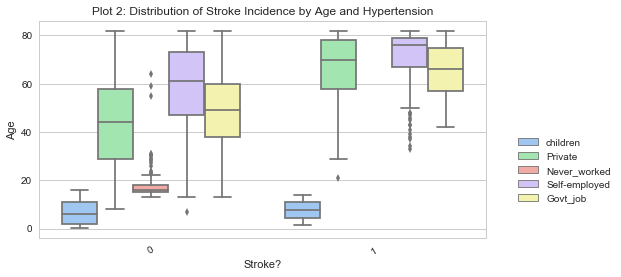

In [39]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.boxplot(x='stroke',y='age',hue = 'work_type', data=df2,palette='pastel')  
plt.title('Plot 2: Distribution of Stroke Incidence by Age and Hypertension')
plt.xticks(rotation=30)
#sns.despine(offset=10, trim=True)
ax.set(xlabel='Stroke?', ylabel='Age')
ax.set(xlabel='Stroke?', ylabel='Age')
# Put a legend to the right side
ax.legend(loc='best', bbox_to_anchor=(1.3, .5), ncol=1)
plt.show()

# 5. Exploratory Data Analysis

#### Pros and Cons of the Dataset:
Pros: 
- Data is relatively clean and easy to understand
- Has a variety of categories one can consider in investigating stroke
- Analysis of dataset replicates views present in the literature regarding characteristics that correlate with stroke incidence
Cons: 
- We don't know where the dataset originates from (is it from a particular state or country, when was this dataset collected, etc).
- We don't know if there was any bias in collecting this data - this ties in with not knowing the origin of this dataset
- We don't have details on # of incidences of stroke for patients; this removes resolution on whether some charactertics are predictive of repeat strokes. 
- Ethnicity and socioeconomic situation are not listed; these may be contributing (or in this dataframe's case, confounding) variables to consider.


## 6. Future Research Plan
- Analysis that highlights experimental hypothesis.
- A rollout plan showing how to implement and rollout the experiment
- An evaluation plan showing what constitutes success in this experiment

### 6a. Analysis and Hypothesis
We note that increased *blah - fill later* leads to increases in stroke incidence. We hypothesize that giving patients low dose metformin on a daily basis can reduce *blah - fill later* and therefore reduce incidence of stroke.

See link for further background: https://www.ncbi.nlm.nih.gov/pubmed/24119365

### 6b. Rollout Plan
50 patients ages 40-50 that have (x range) of (y measure) will be divided into two groups: 25 participants in the control group and 25 participants in the experimental group (aka A and B groups, in line with A/B testing).

Patients in the control group will be given a placebo pill to 



### 6b. Evaluation Plan
